## Loading a CSV File with pandas in VSCode


In [ ]:
#Definir FUNCIÓN que me permitirá importar un archivo CSV y cargarlo en un DataFrame de pandas
def import_csv(file):
    # Read the csv file into a DataFrame: df con el paquete pandas
    import pandas as pd  #Python llama a paquetería pandas 
    return pd.read_csv(file)

In [ ]:
#Utilizar el nombre de la FUNCIÓN PREdefinida y el nombre del archivo .csv
import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [ ]:
#Definir una VARIABLE para poder manipular el DataFrame (no solo visualizarlo)
terminos_df = import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

#### Exploring DataFrame (antes csv) with pandas

In [ ]:
#Explorar el DataFrame
#Print variable names
print(terminos_df.columns)

In [ ]:
print(terminos_df.shape) #Muestra el número de filas y columnas

In [ ]:
print(terminos_df.head())  #Muestra las primeras 5 filas del DataFrame por default. Puedes especificar otro número como parámatro/argumento

In [ ]:
print(terminos_df.tail(3))  #Muestra las últimas 5 filas

In [ ]:
print(terminos_df.info())  #Muestra información general

In [ ]:
print(terminos_df.describe())  #Muestra estadísticas descriptivas básicas



*Si estás trabajando en un archivo .ipynb (Jupyter Notebook), no necesitas usar print(), basta con poner el comando en una celda. Obtienes una mejor interfaz en la representación de la tabla.*

In [ ]:
terminos_df.describe()

 # 04 Estadística descriptiva de una DataFrame

## Exploring DataFrame

In [ ]:
# Print the number of rows and columns in the DataFrame
terminos_df.shape

In [ ]:
# Print the head of the DataFrame
terminos_df.head()

#### Print information about a DataFrame including the index dtype and columns, non-null values and memory usage

In [ ]:
# Print information about the DataFrame
terminos_df.info()

In [ ]:
# Print descriptive statistics
terminos_df.describe()

#### Group the data by a categorical column, and calculate the mean and standard deviation of a numerical column

## Missing values in each column

In [ ]:
# Use the Pandas isnull() function to identify the number of missing values in each column.
terminos_df.isnull().sum()

#### Method to use for filling holes in reindexed Series


#**ffill**: propagate last valid observation forward to next valid.

#**bfill**: use next valid observation to fill gap.

In [ ]:
# Create new data frame (with missing values filled)
terminos_df_fill = terminos_df.copy()

In [ ]:
# Use fill method 
terminos_df_fill = terminos_df_fill.ffill()  #Pronto estará en desuso: terminos_df_fill.fillna(method="ffill")

In [ ]:
terminos_df_fill.isnull().sum()

#### Interpolation for filling missing values

In [ ]:
terminos_df_fill_linear = terminos_df.copy()
terminos_df_fill_linear = terminos_df_fill_linear.interpolate(method='linear')
print(terminos_df_fill_linear.isnull().sum())

# Exercises

#### Opción 1: Group the data by a categorical column, and calculate the mean and standard deviation of a numerical column

1. Create a new column called "TA_DIC_ratio" that is the ratio of TA to DIC (TA/DIC)

In [ ]:
terminos_df["TA_DIC_ratio"] = terminos_df["ta_micromol_kg"] / terminos_df["dic_micromol_kg"]



In [ ]:
terminos_df["TA_DIC_ratio"].plot() #Hacer un gráfico de la nueva columna para visualizar la razón TA/DIC rápidamente

In [ ]:
terminos_df["TA_DIC_ratio"].isnull().sum()  #Verificar si hay valores nulos (que puedan sesgar los resultados e interpretación) en la nueva columna


In [ ]:
import matplotlib.pyplot as plt

#Boxplot para ver rango y valores atípicos: Observación rápida de la variabilidad y posibles valores extremos
plt.boxplot(terminos_df["TA_DIC_ratio"].dropna())
plt.ylabel("TA/DIC ratio")
plt.title("Boxplot del radio TA/DIC")
plt.show()


In [ ]:
#Histograma para ver la distribución de datos
import matplotlib.pyplot as plt

plt.hist(terminos_df["TA_DIC_ratio"].dropna(), bins=30, edgecolor="black")
plt.xlabel("TA/DIC ratio")
plt.ylabel("Frecuencia")
plt.title("Distribución del radio TA/DIC")
plt.show()


2. Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season

In [ ]:
TA_DIC_ratio = terminos_df["TA_DIC_ratio"] #Definir una variable con la nueva columna para facilitar el análisis estadístico

In [ ]:
#Filtrar datos de estación Dry
terminos_df_dry = terminos_df[terminos_df["season"] == "Dry"]
media_dry = terminos_df_dry["TA_DIC_ratio"].mean()
std_dry = terminos_df_dry["TA_DIC_ratio"].std()

In [ ]:
terminos_df_dry

In [ ]:
media_dry

In [ ]:
std_dry

In [ ]:
#Filtrar datos de estación Rainy
terminos_df_rainy = terminos_df[terminos_df["season"] == "Rainy"]
media_rainy = terminos_df_rainy["TA_DIC_ratio"].mean()
std_rainy = terminos_df_rainy["TA_DIC_ratio"].std()

In [ ]:
terminos_df_rainy

In [ ]:
media_rainy

In [ ]:
std_rainy

3. Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season and area


In [ ]:
#Filtrar datos por estación Dry y por area
terminos_df_dry_area = terminos_df[
	(terminos_df["season"] == "Dry") &
	(terminos_df["area"].isin(["Coast", "River", "Plume"]))
]

In [ ]:
media_dry_area = terminos_df_dry_area["TA_DIC_ratio"].mean()
media_dry_area

In [ ]:
std_dry_area = terminos_df_dry_area["TA_DIC_ratio"].std()
std_dry_area

In [ ]:
#Filtrar datos por estación Rainy y por area
terminos_df_rainy_area = terminos_df[
	(terminos_df["season"] == "Rainy") &
	(terminos_df["area"].isin(["Coast", "River", "Plume"]))
]

In [ ]:
media_rainy_area = terminos_df_rainy_area["TA_DIC_ratio"].mean()
media_rainy_area

In [ ]:
std_rainy_area = terminos_df_rainy_area["TA_DIC_ratio"].std()
std_rainy_area

4. Save the results to an Excel file called "TA_DIC_Season_Areas.xlsx"

In [ ]:
import pandas as pd

with pd.ExcelWriter("C:\Projects\modelab_jp\TA_DIC_Season_Areas.xlsx") as writer:
    terminos_df_dry_area.to_excel(writer, sheet_name="Dry Season")
    terminos_df_rainy_area.to_excel(writer, sheet_name="Rainy Season")

# 05 Group by a categorical column, and calculate the mean and standard deviation of a numerical column

#### Opción 2: Group the data by a categorical column, and calculate the mean and standard deviation of a numerical column

In [ ]:
# Definir las columnas a analizar
variables = ['dic_micromol_kg', 'ta_micromol_kg', 'TA_DIC_ratio']

# Calcular la media y la desviación estándar agrupando por season y area
result = terminos_df.groupby(['season', 'area'])[variables].agg(['mean', 'std']).reset_index()

In [ ]:
# Renombrar las columnas para mayor claridad
result.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in result.columns]

# Mostrar el resultado
print(result)

In [ ]:
import pandas as pd
from tabulate import tabulate

In [ ]:
# Formatear los valores para mostrar "media ± desviación estándar" sin notación científica y con dos cifras decimales
for var in variables:
    mean_col = f"{var}_mean"
    std_col = f"{var}_std"
    result[f"{var}_formatted"] = result.apply(lambda row: f"{row[mean_col]:,.2f} ± {row[std_col]:,.2f}", axis=1)

In [ ]:
# Seleccionar solo las columnas formateadas junto con los índices
formatted_result = result[['season_', 'area_'] + [f"{var}_formatted" for var in variables]]

In [ ]:
# Mostrar la tabla con los resultados formateados usando tabulate
table = tabulate(formatted_result, headers='keys', tablefmt='pretty', showindex=False)
print(table)

In [ ]:
# Guardar la tabla en un archivo CSV
formatted_result.to_csv("TA_DIC_Season_Areas2.csv", index=False)

**Tabla para reseach articles (papers)**
Después de salvar nuestra tabla como csv, se recomienda:
1. Abrir el csv con bloc de notas
2. Copiar y pegaren en Word
3. Insertar tabla, convertir texto en tabla, separar por comas, ajustar columnas y filas, dar formato a la tabla (bordes, tamaño de letra, etc.)
4. Verificar que no haya errores de formato o tipográficos (comas en entre miles y decimales, etc.)
5. Guardar el documento de Word con la tabla ya formateada

# 06 Plot_descriptive_statistics_matplotib

In [ ]:
terminos_df.head()

In [ ]:
terminos_df.tail()

#### Plot a simple histogram

In [ ]:
import matplotlib.pyplot as plt

# Select data
sal_data = terminos_df["sal_psu"]

plt.hist(sal_data, bins=10)
plt.xlabel("Salinity (PSU)")
plt.ylabel("Probablity")
plt.show()

#### Normalize our inputs by the total number of counts

In [ ]:
# Plot the histogram with density (nomalized)
# Select data 
data = terminos_df["sal_psu"]


plt.hist(data, bins=10, density=True)
plt.xlabel("Salinity (PSU)")
plt.ylabel("Probablity")
plt.show()

#### Boxplot Demo

In [ ]:
# Creating plot

do_data = terminos_df["do_mg_l"]
plt.boxplot(do_data)

plt.xlabel("DO (mg/L)")
plt.ylabel("Concentration")
plt.title("Boxplot of DO Concentration")

# show plot
plt.show()

In [ ]:
# Plot boxplot for salinity data
data = terminos_df["sal_psu"]

fig2, ax2 = plt.subplots()

ax2.set_title('Notched boxes')
ax2.boxplot(data, notch=True)

plt.ylabel('Salinity ($PSU$)', fontsize = 12)
plt.show()

In [ ]:
# Plot boxplot for TA data
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()

ax3.set_title('Changed Outlier Symbols')

ax3.boxplot(data, flierprops=green_diamond)


plt.ylabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12)
plt.show()

# Exercise: Plot histogram of DIC and TA

In [ ]:
terminos_df.info()

In [ ]:
#Plot histogram of DIC
import matplotlib.pyplot as plt

# Select data DIC
sal_data = terminos_df["dic_micromol_kg"]

plt.hist(sal_data, bins=10, color='mediumseagreen', edgecolor='black')
plt.xlabel("DIC (µmol/kg)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Plot histogram of TA
ta_data = terminos_df["ta_micromol_kg"]

# Select data TA
plt.hist(ta_data, bins=10, color='lightblue', edgecolor='black')
plt.xlabel("TA (µmol/kg)")
plt.ylabel("Frequency")
plt.show()

# 07 Seaborn: statistical data visualization

In [ ]:
import pandas as pd
# Import the air quality dataset 

terminos_df.info()

In [ ]:
#Load libs and set figure
import seaborn as sns
import matplotlib.pyplot as plt 

#create your own color array (viridis)
my_colors = sns.color_palette(palette='Accent')  #https://www.practicalpythonfordatascience.com/ap_seaborn_palette

# add color array to set_palette
sns.set(font_scale=2, style="ticks", palette= my_colors)

In [ ]:
#plot boxplot with Catplot in Seaborn
ax = sns.catplot(data=terminos_df,
                 x="area", y="ta_micromol_kg",
                hue="season", col="estuary",
                kind="box", 
                height=7, aspect=1)

  
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.setp(ax._legend.get_title(), fontsize=20)
sns.despine(top=False,right=False)

plt.show()

In [ ]:
#plot a violin with Catplot in Seaborn
ax = sns.catplot(data=terminos_df, 
                x="area", y="ta_micromol_kg",
                hue="season", col="estuary", 
                kind="violin", 
                height=7, aspect=1)

  
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.setp(ax._legend.get_title(), fontsize=20)
sns.despine(top=False,right=False)

plt.show()

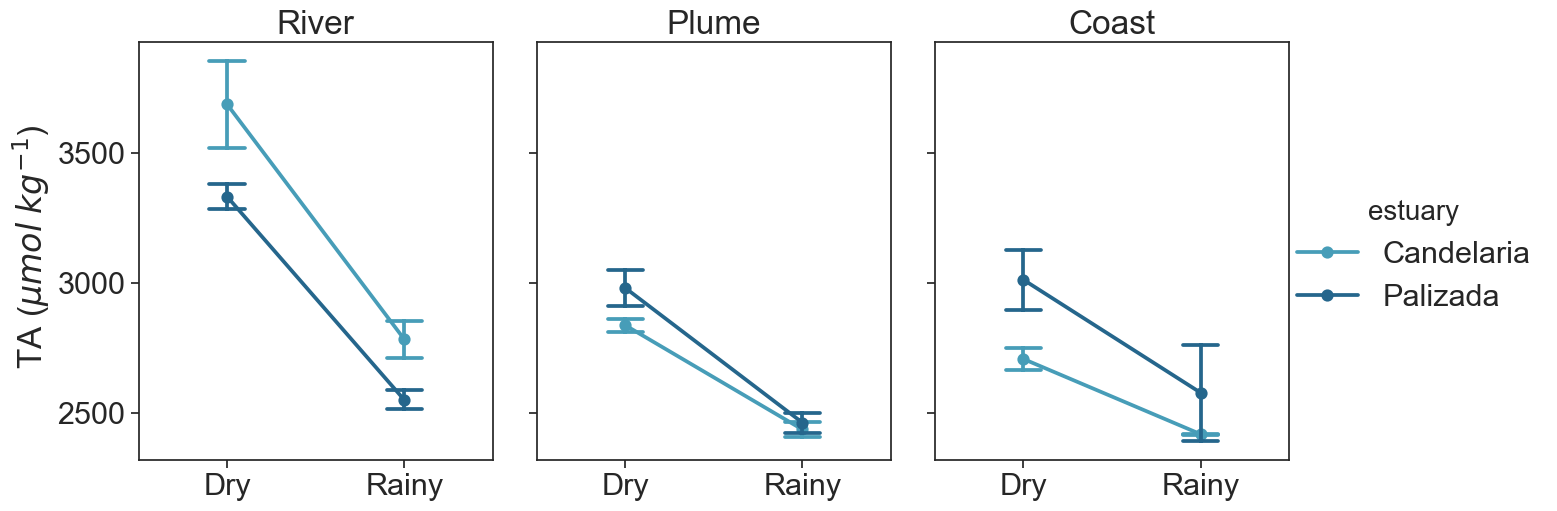

In [66]:
#Plotting a three-way ANOVA
# Draw a pointplot to show pulse as a function of three categorical factors
ax = sns.catplot(
    data=terminos_df, x="season", 
    y="ta_micromol_kg", hue="estuary", col="area",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
ax.despine(left=True)
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.setp(ax._legend.get_title(), fontsize=20)
sns.despine(top=False,right=False)

plt.show()

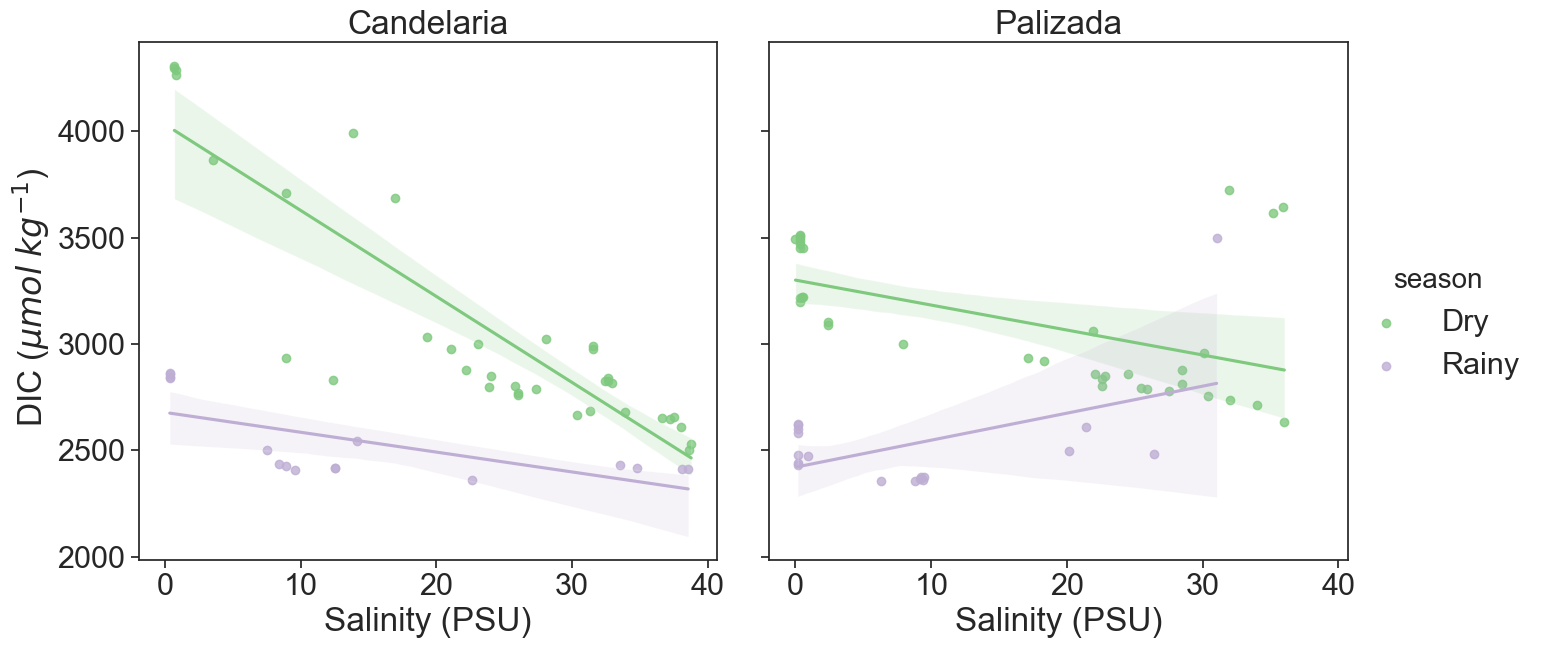

In [67]:
#Scatterplots DIC vs Salinity by Estuary
ax = sns.lmplot(x="sal_psu", y="ta_micromol_kg",
                hue="season",col="estuary",
                data=terminos_df, 
                height=7, aspect=1)

ax.set(xlabel='Salinity (PSU)', ylabel=' DIC ($\mu mol \; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.setp(ax._legend.get_title(), fontsize=20)
sns.despine(top=False,right=False)

plt.show()

## Exercise

1. How can you modify the units of the figures?

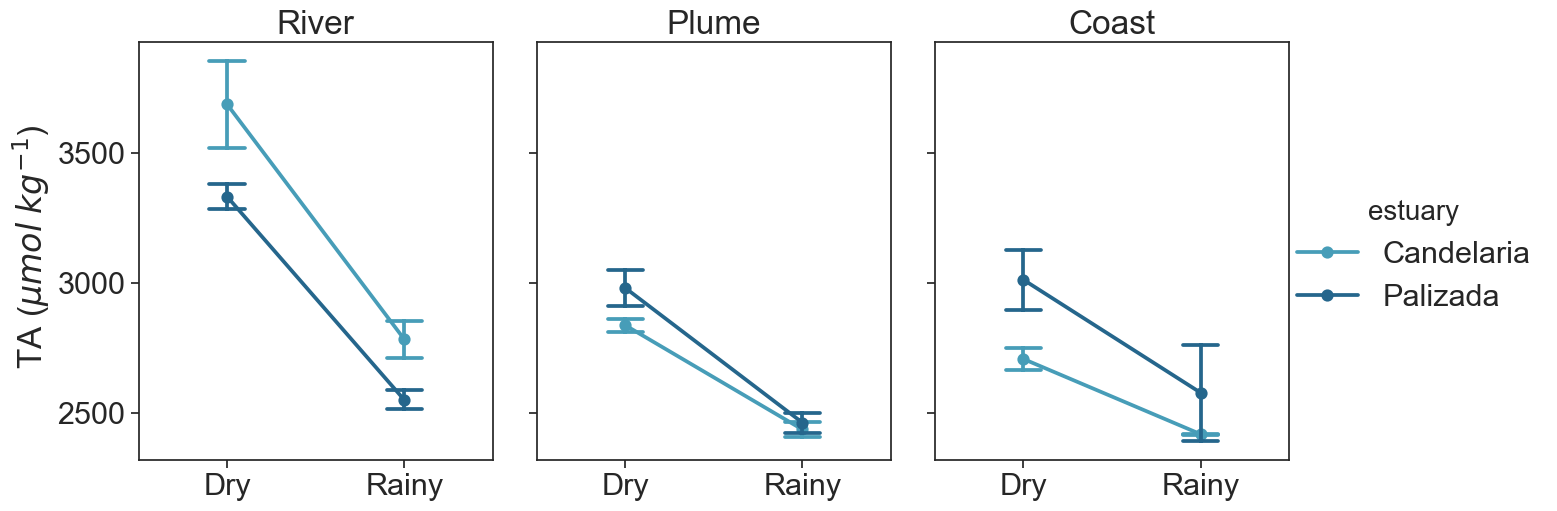

In [69]:
#Plotting a three-way ANOVA
# Draw a pointplot to show pulse as a function of three categorical factors
ax = sns.catplot(
    data=terminos_df, x="season", 
    y="ta_micromol_kg", hue="estuary", col="area",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
ax.despine(left=True)
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.setp(ax._legend.get_title(), fontsize=20)
sns.despine(top=False,right=False)

plt.show()

c:\Users\JudithP.DESKTOP-RHSB5HU\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\JudithP.DESKTOP-RHSB5HU\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


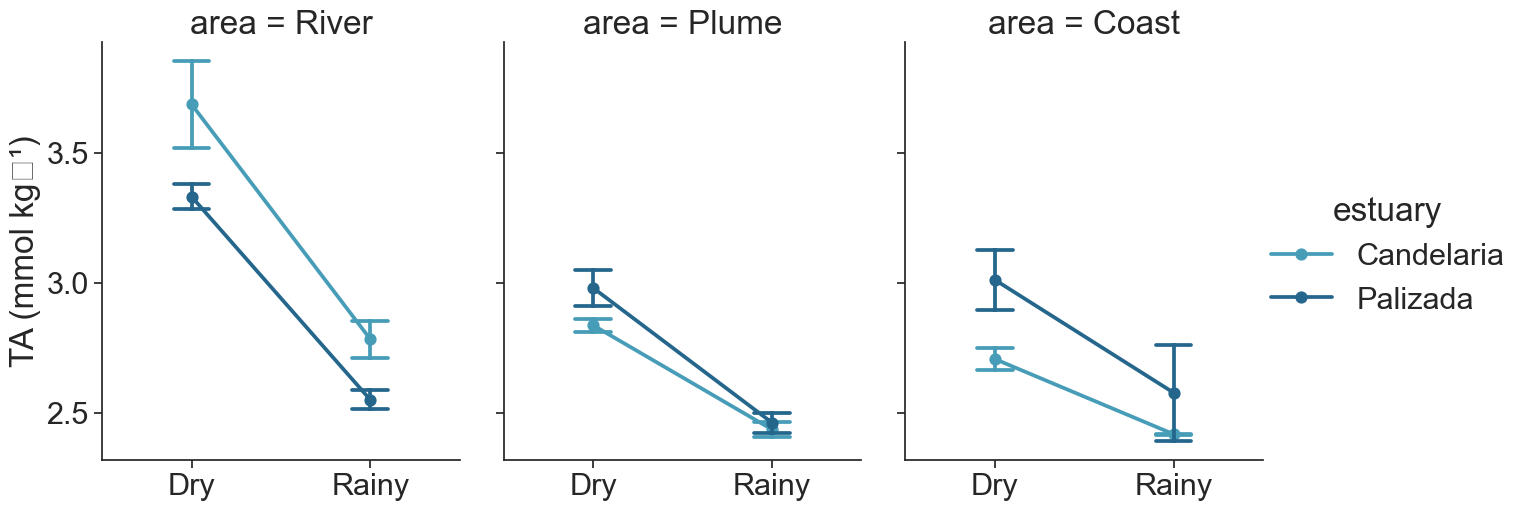

In [70]:
terminos_df["ta_mmol_kg"] = terminos_df["ta_micromol_kg"] / 1000

ax = sns.catplot(
    data=terminos_df, x="season", 
    y="ta_mmol_kg", hue="estuary", col="area",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
ax.set(xlabel='', ylabel='TA (mmol kg⁻¹)')


2. Check the examples at https://seaborn.pydata.org/ and create your own figures. If possible, use your own data

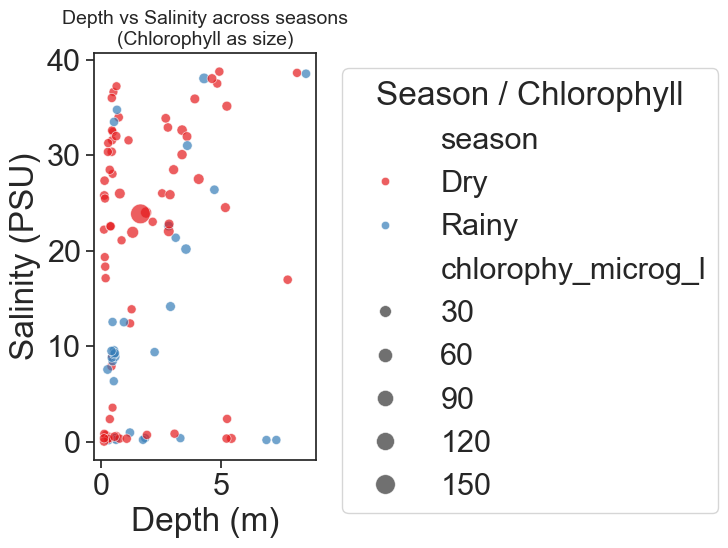

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: Depth vs Salinity, coloreado por Season y con tamaño de Chlorophyll
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=terminos_df,
    x="depth_m",
    y="sal_psu",
    hue="season",                      # Colores por Dry/Rainy
    size="chlorophy_microg_l",         # Tamaño = concentración de clorofila
    palette="Set1",
    sizes=(40, 200),                   # Rango de tamaños
    alpha=0.7                          # Transparencia
)

plt.title("Depth vs Salinity across seasons\n(Chlorophyll as size)", fontsize=14)
plt.xlabel("Depth (m)")
plt.ylabel("Salinity (PSU)")
plt.legend(title="Season / Chlorophyll", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()